In [2]:
from os import path as op
import sys
import numpy as np
import mne
import autoreject

from library import config, helpers

In [32]:
def get_ica_weights(subID, data_, ica_from_disc = False, reject=None,
                    method='picard', fit_params=None, picks=None, save_to_disc=True):
    ### Load ICA data (after comp rejection)?
    if ica_from_disc:
        ica = mne.preprocessing.read_ica(fname=op.join(config.paths['03_preproc-ica'], subID + '-ica.fif'))
    else:
        # data_.drop_bad(reject=reject)
        ica = mne.preprocessing.ICA(method=method, 
                                    fit_params=fit_params)
        ica.fit(data_, picks=picks)
        if save_to_disc:
            ica.save(fname=op.join(config.paths['03_preproc-ica'], subID + '-ica.fif'))
    return ica

In [42]:
subID = 'VME_S20'
# get BP [1; 40Hz] filtered data to train ICA:
data_forica = helpers.load_data(subID + '-stimon',
                                config.paths['02_epochs'],
                                append='-epo')

ica_raw = get_ica_weights(subID,
                      data_forica,
                      ica_from_disc=True,
                      #method='infomax',
                      #fit_params={'extended':True},
                      picks=['eeg','meg'],
                      save_to_disc=False)

Reading /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/02_epochs/VME_S20-stimon-epo.fif ...
    Found the data of interest:
        t =    -600.00 ...    2300.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Reading /raven/ptmp/fklotzsche/Experiments/vMemEcc/Data2022/DataMNE/EEG/03_preproc-ica/VME_S20-ica.fif ...
Now restoring ICA solution ...
Ready.


In [43]:
ica_raw.plot_components()

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>]

/tmp/ipykernel_55983/1896110453.py:5: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  ica_raw.plot_sources(data_forica)


Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


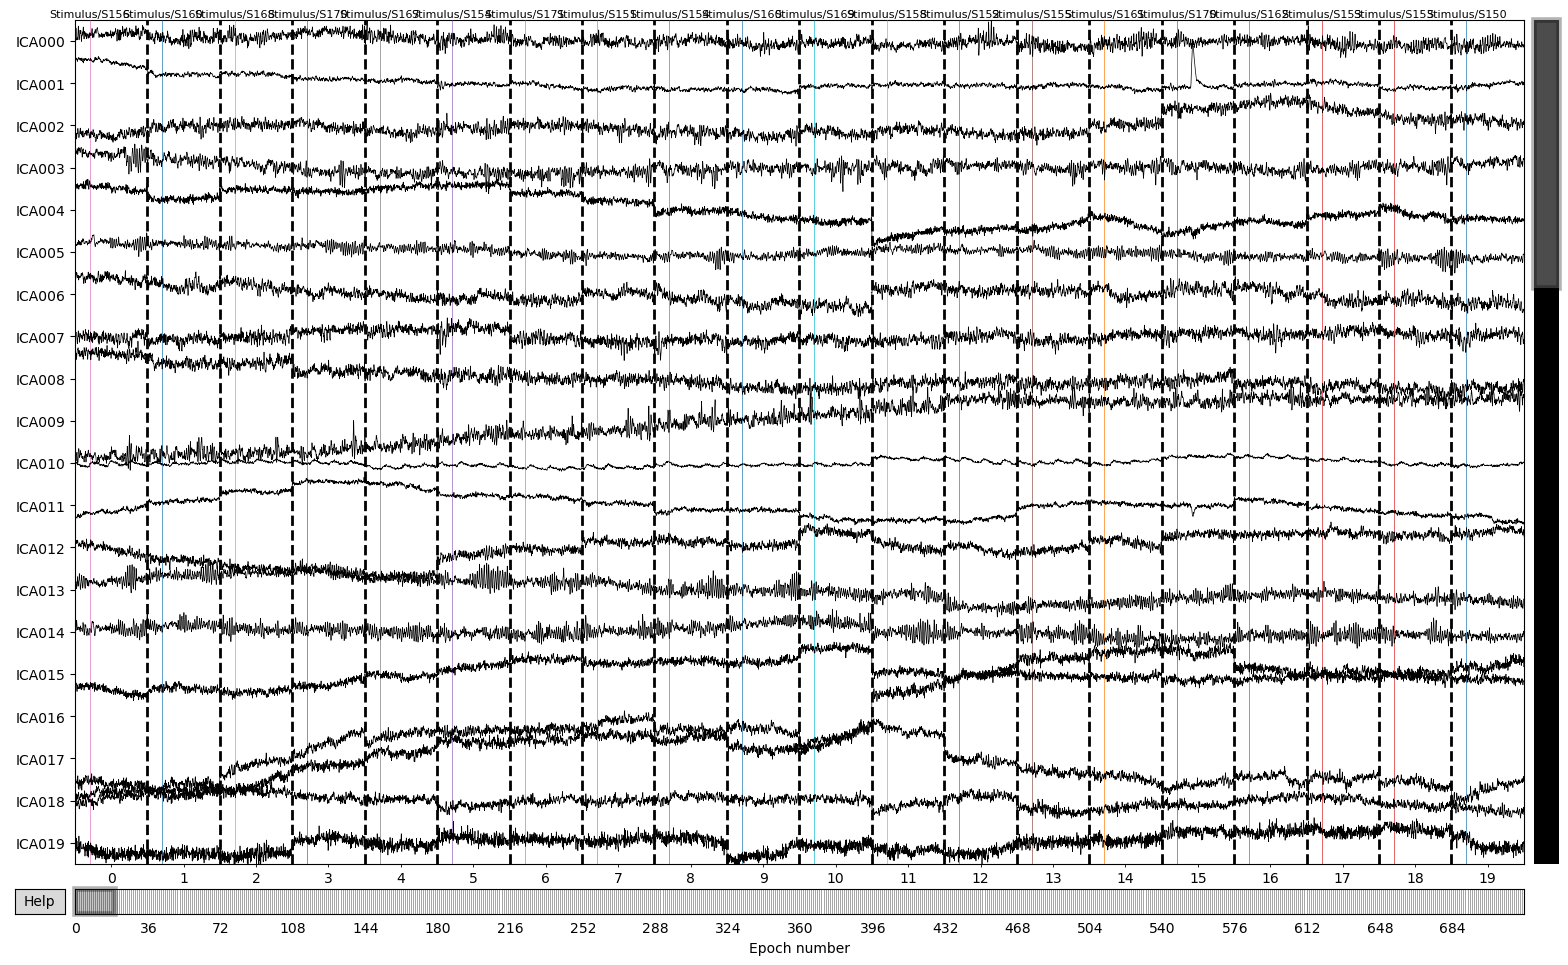

Traceback (most recent call last):
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/mne/viz/_figure.py", line 405, in _close
    self.mne.ica.exclude = [self.mne.ica._ica_names.index(ch)
  File "/u/fklotzsche/conda-envs/mne/lib/python3.9/site-packages/mne/viz/_figure.py", line 405, in <listcomp>
    self.mne.ica.exclude = [self.mne.ica._ica_names.index(ch)
ValueError: 'ECG' is not in list


In [44]:
%matplotlib qt
picks = ['HEOG', 'VEOG', 'ICA001', 'ICA002', 'ICA003']
i2 = ica_raw.copy()
i2.exclude = np.arange(9,60)
ica_raw.plot_sources(data_forica)

In [45]:
ica_raw.plot_properties(data_forica)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

Applying baseline correction (mode: mean)
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)



/tmp/ipykernel_55983/412852097.py:2: RuntimeWarning: filter_length (1651) is longer than the signal (1451), distortion is likely. Reduce filter length or filter a longer signal.
  data_forica.copy().apply_baseline((-0.4,0)).\


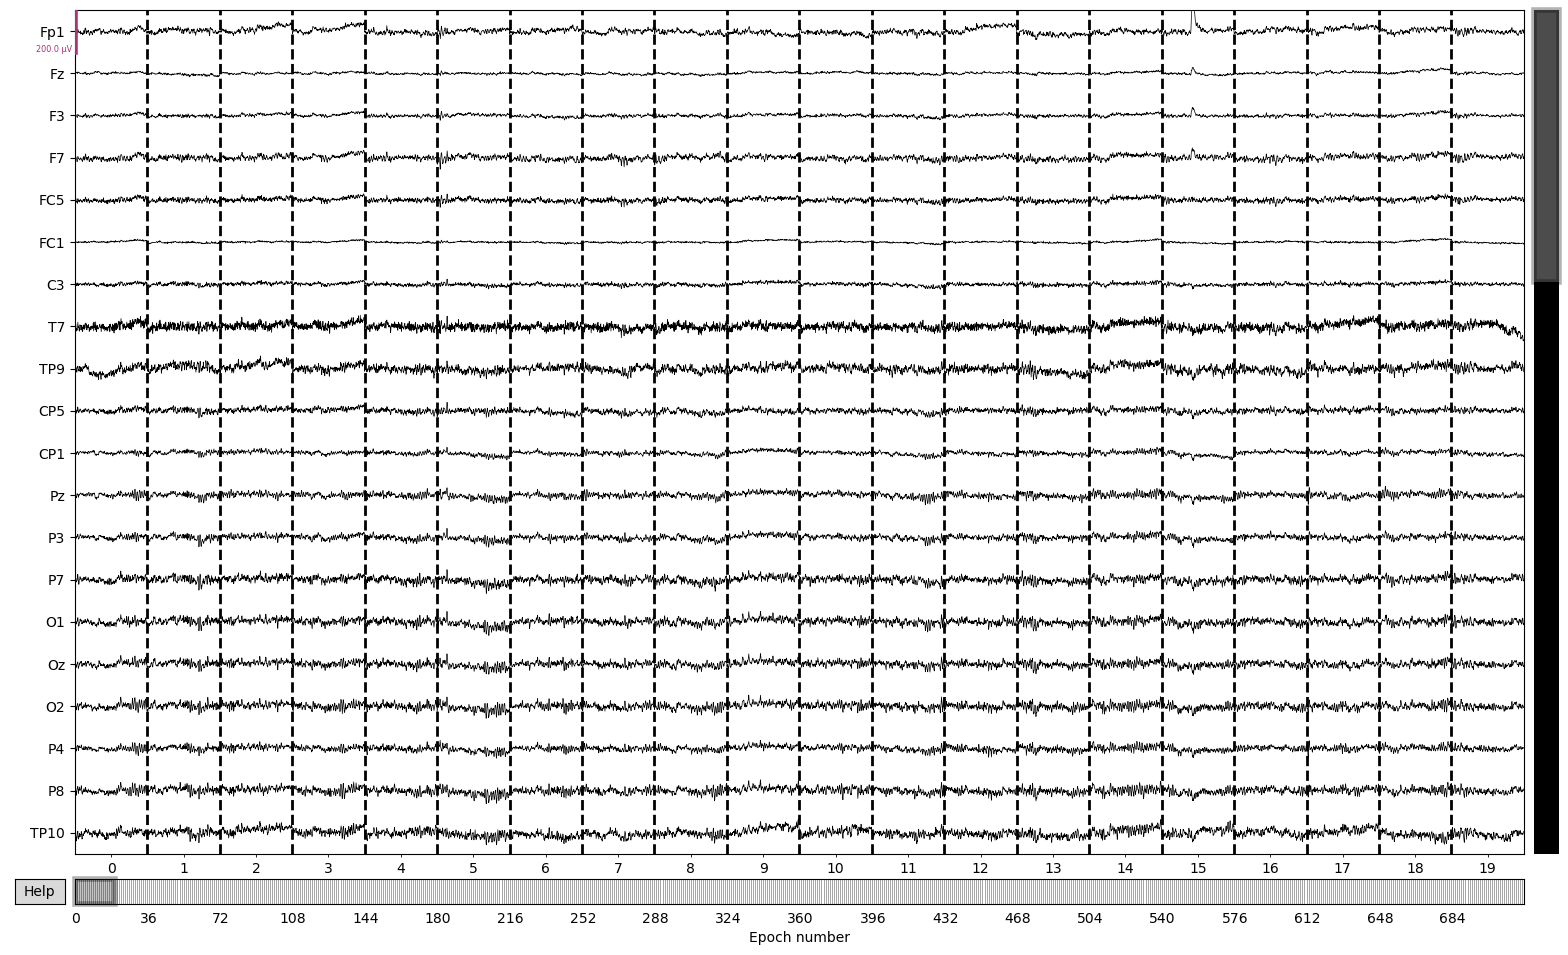

Dropped 0 epochs: 
Channels marked as bad: none


In [30]:
picks = ['eeg', 'eog']
data_forica.copy().apply_baseline((-0.4,0)).\
    filter(picks=['eog'], l_freq=1, h_freq = 40).\
    plot(picks=picks, scalings={'eeg':100e-6, 'eog':100e-6})